In [34]:
from sklearn.datasets import load_diabetes
from sklearn.kernel_ridge import KernelRidge as KRR

from matplotlib import pyplot as plt
from matplotlib import cm

from tqdm.notebook import tqdm

import numpy as np

import sys
sys.path.append('/Users/rosecers/work_folders/cosmo/sklearn-cosmo/')
from skcosmo.selection import CUR, FPS

cmap = cm.brg

For this, we will use the boston housing data provided by scikit-learn.

In [35]:
X, Y = load_diabetes(return_X_y=True)
Y = Y.reshape(X.shape[0], -1)

First, let's demonstrate CUR feature selection, and show the ten features chosen with a mixing parameter of 0.0, 0.5, and 1.0 perform.

In [36]:
import sys
sys.path.append('/Users/rosecers/work_folders/cosmo/kernel-tutorials/')
from utilities.classes import SparseKRR

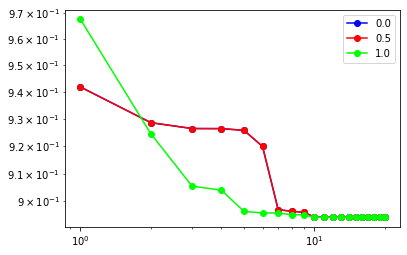

In [39]:
n = 20

for m in [0.0, 0.5, 1.0]:
    ss = CUR.sampleCUR(X, # Matrix to select from
                        mixing=m, # Weight towards regression
                        Y=Y) # Y is an optional parameter when m = 1
    ss.select(n)

    errors = np.nan * np.zeros(len(ss.idx))
    for ni in range(len(ss.idx)):
        X_sparse = X[ss.idx[:ni+1]]
        K = X @ X_sparse.T
        K_mm = X_sparse @ X_sparse.T
        
        skrr = SparseKRR(kernel='linear', n_active=ni, regularization_parameter=1E-4)
        skrr.fit(X=None, Y=Y, Knm=K, Kmm=K_mm)
        Yp = skrr.transform(X=None, Knm=K)
        errors[ni] = (np.linalg.norm(Y - Yp)**2.0 / np.linalg.norm(Y)**2.0)

    plt.loglog(range(1,n+1), errors, label=m, c=cmap(m), marker='o')
    
plt.legend()
plt.show()

You can provide additional parameters to sampleCUR, including:
- `tolerance`: (a cutoff for small eigenvalues, default=1E-12)
- `k`: number of eigenvectors to use in calculation of importance function $\pi$. (Recommended value: 1)
- `iterative`: (boolean) whether to compute the importance function $\pi$ iteratively

Next, let's look at FPS. We'll choose the first index from CUR at m = 1, which is 9.

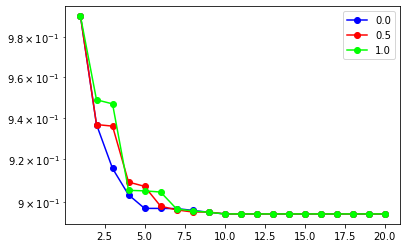

In [38]:
n = 20

for m in [0.0, 0.5, 1.0]:
    ss = FPS.sampleFPS(X, 
                        mixing=m, 
                        Y=Y,
                        idxs = [9]
                       ) 
    ss.select(n)

    errors = np.nan * np.zeros(len(ss.idx))
    for ni in range(len(ss.idx)):
        X_sparse = X[ss.idx[:ni+1]]
        K = X @ X_sparse.T
        K_mm = X_sparse @ X_sparse.T
        
        skrr = SparseKRR(kernel='linear', n_active=ni, regularization_parameter=1E-12)
        skrr.fit(X=None, Y=Y, Knm=K, Kmm=K_mm)
        Yp = skrr.transform(X=None, Knm=K)
        errors[ni] = (np.linalg.norm(Y - Yp)**2.0 / np.linalg.norm(Y)**2.0)

    plt.semilogy(range(1,n+1), errors, label=m, c=cmap(m), marker='o')
    
plt.legend()
plt.show()

You can provide additional parameters to sampleFPS, including:
- `tolerance`: (a cutoff for small eigenvalues, default=1E-12)
- `idxs`: indices to use as the initial selections for FPS. If none are provided, the first selection is made at random.